In [71]:
import pandas as pd

passangers = pd.read_csv("airline-passengers.csv")
y = passangers['Passengers'].to_numpy()
y = y[:10]
X = np.arange(10).reshape(-1, 1)

X_train, y_train = X[:4], y[:4]

# y = (y - y_train.min()) / (y_train.max() - y_train.min())
# y_train = (y_train - y_train.min()) / (y_train.max() - y_train.min())
mean = y_train.mean()
y_train = y_train - mean
y = y

In [56]:
import numpy as np

X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))

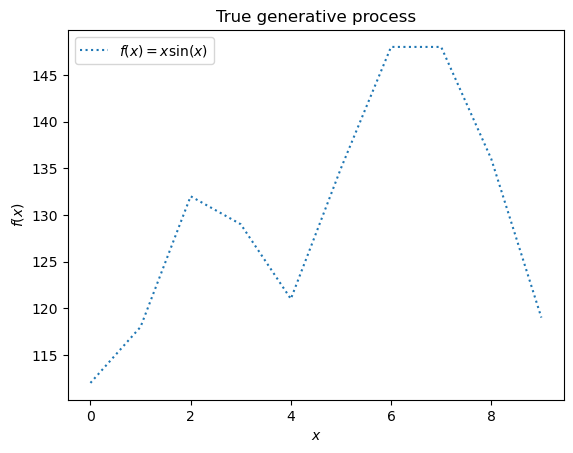

In [72]:
import matplotlib.pyplot as plt

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

In [14]:
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

In [73]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 20.0 * RBF(length_scale=20.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)

GaussianProcessRegressor(kernel=4.47**2 * RBF(length_scale=20),
                         n_restarts_optimizer=9)

In [74]:
gaussian_process.kernel_

8.22**2 * RBF(length_scale=0.953)

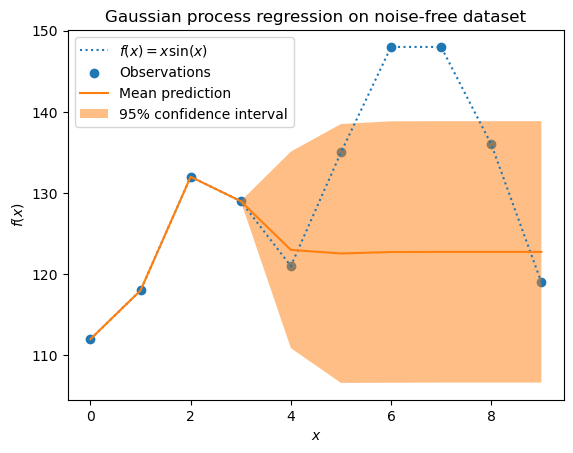

In [75]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

mean_prediction += mean

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X, y, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")